In [ ]:
!pip install numpy matplotlib pandas opencv-python tk pydicom opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 18.3 MB/s eta 0:00:00


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: warningoutofmind
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


In [ ]:
!ls brain-mri-images-for-brain-tumor-detection/

brain_tumor_dataset  no  yes


Image loaded successfully. Shape: (212, 209)


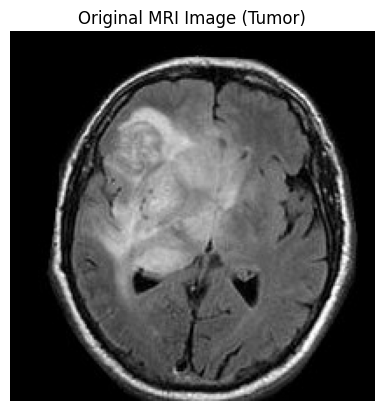

In [ ]:
import cv2
import matplotlib.pyplot as plt

# load a certain image
image_path = 'brain-mri-images-for-brain-tumor-detection/yes/Y2.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Could not load image. Check the file path.")
else:
    print("Image loaded successfully. Shape:", image.shape)

plt.imshow(image, cmap='gray')
plt.title("Original MRI Image (Tumor)")
plt.axis('off')
plt.show()

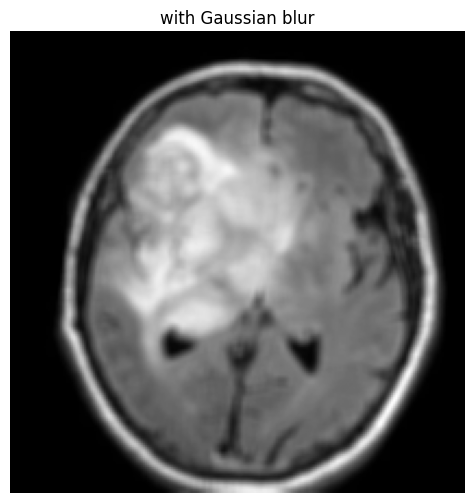

In [ ]:
# preprocess: apply gaussian blur and display images side by side

blurred_image = cv2.GaussianBlur(image, (5,5), cv2.BORDER_DEFAULT) # 0 is standard deviation
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title("Original MRI Image")
plt.axis("off")

# blurred
plt.subplot(1,2,1)
plt.imshow(blurred_image, cmap="gray")
plt.title("with Gaussian blur")
plt.axis("off")

plt.tight_layout()
plt.show()

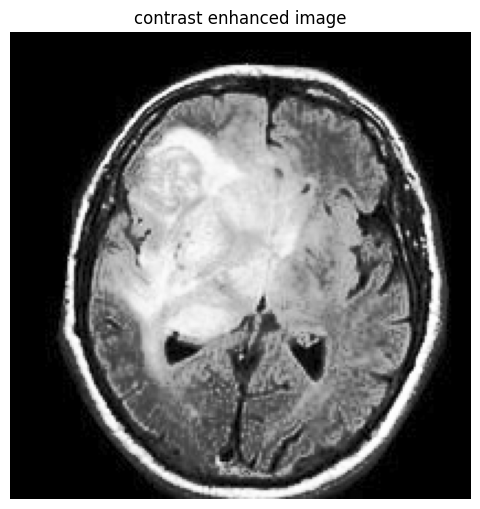

In [ ]:
# apply contrast enhancement
enhanced_image = cv2.equalizeHist(image)
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(enhanced_image, cmap="gray")
plt.axis("off")
plt.title("contrast enhanced image")
plt.tight_layout()
plt.show()

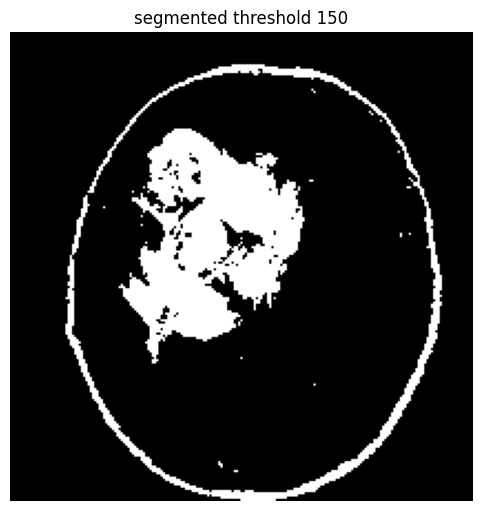

min intensity: 0 max intensity:  255


In [ ]:
#thresholding and segmentation
# this differentiates the healthy tissue from the tumor tissue

_, segmented_image = cv2.threshold(enhanced_image, 200, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.imshow(segmented_image, cmap="gray")
plt.title("segmented threshold 150")
plt.axis("off")
plt.tight_layout()
plt.show()

print("min intensity:", enhanced_image.min(), "max intensity: ", enhanced_image.max())

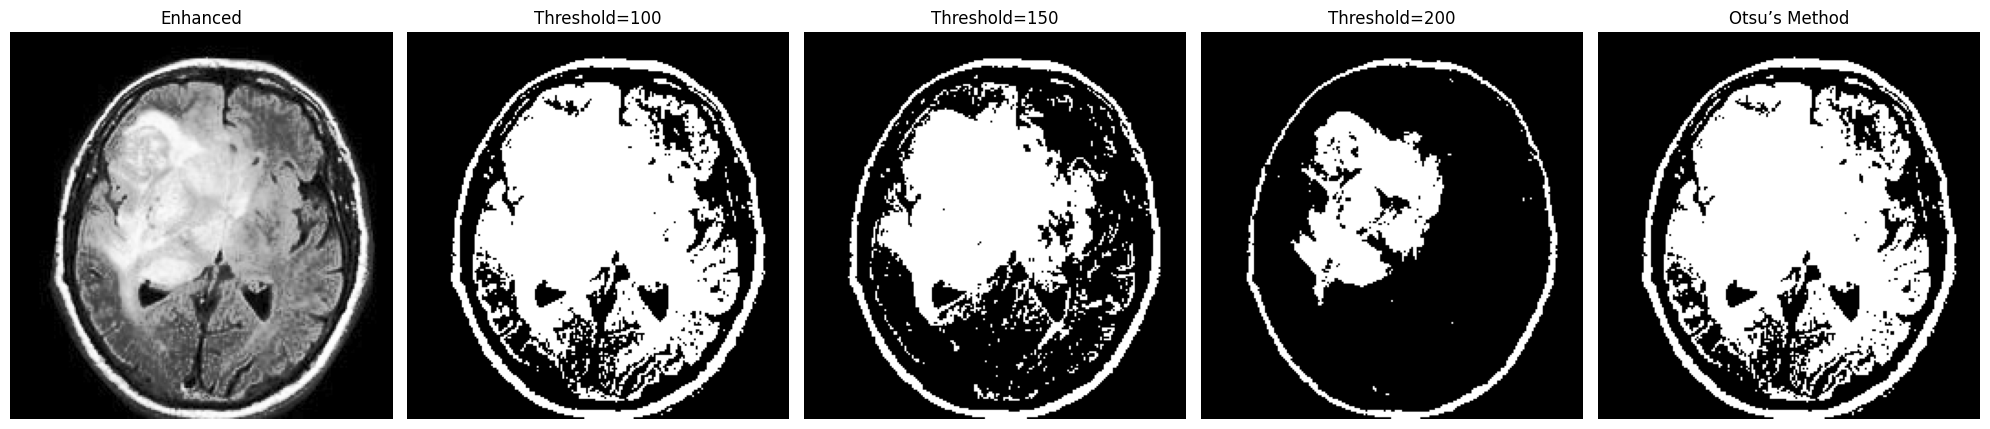

Enhanced image intensity range: 0 to 255


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Multiple thresholds
_, seg_100 = cv2.threshold(enhanced_image, 100, 255, cv2.THRESH_BINARY)
_, seg_150 = cv2.threshold(enhanced_image, 150, 255, cv2.THRESH_BINARY)
_, seg_200 = cv2.threshold(enhanced_image, 200, 255, cv2.THRESH_BINARY)
_, seg_otsu = cv2.threshold(enhanced_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(20, 5))
plt.subplot(1, 5, 1)
plt.imshow(enhanced_image, cmap='gray')
plt.title("Enhanced")
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(seg_100, cmap='gray')
plt.title("Threshold=100")
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(seg_150, cmap='gray')
plt.title("Threshold=150")
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(seg_200, cmap='gray')
plt.title("Threshold=200")
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(seg_otsu, cmap='gray')
plt.title("Otsu’s Method")
plt.axis('off')

plt.tight_layout()
plt.show()

print("Enhanced image intensity range:", enhanced_image.min(), "to", enhanced_image.max())